In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.utils import resample
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB


# Loading Dataset

In [2]:
data = pd.read_csv('spam.csv', encoding='latin1')
data.head()



,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'])


In [4]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data = data.rename(columns={"v1":"Target", "v2":"Message"})
data.head()

,Target,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
ln = LabelEncoder()
data["Target"] = ln.fit_transform(data["Target"])

In [7]:
data.head()

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Target   5572 non-null   int32 
 1   Message  5572 non-null   object
dtypes: int32(1), object(1)
memory usage: 65.4+ KB


# Data Visualization and Preprocessing

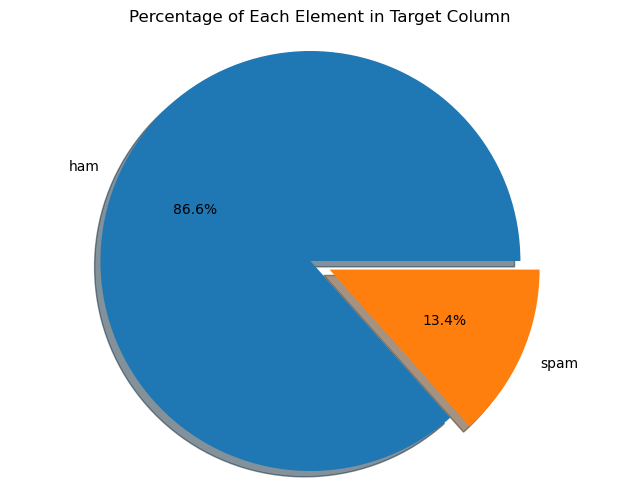

In [9]:
Target_percentage = data['Target'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
plt.pie(Target_percentage, labels=['ham' , 'spam'], autopct='%1.1f%%', shadow = True, explode = [0,0.1])
plt.title('Percentage of Each Element in Target Column')
plt.axis('equal')  
plt.show()


In [23]:
data_majority = data[data['Target'] == 0]
data_minority = data[data['Target'] == 1]


data_minority_upsampled = resample(data_minority,
                                  replace=True,  
                                  n_samples=len(data_majority),  
                                  random_state=42)  


data = pd.concat([data_majority, data_minority_upsampled])


print('Resampled class distribution:', Counter(data2['Target']))



Resampled class distribution: Counter({0: 4825, 1: 4825})


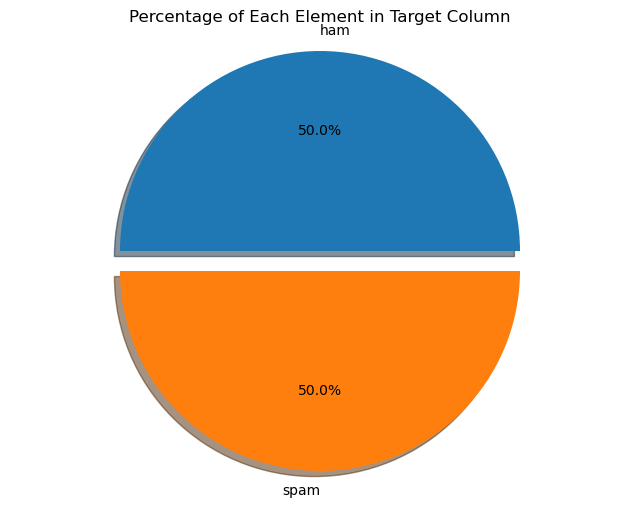

In [24]:
Target_percentage = data['Target'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
plt.pie(Target_percentage, labels=['ham' , 'spam'], autopct='%1.1f%%', shadow = True, explode = [0,0.1])
plt.title('Percentage of Each Element in Target Column')
plt.axis('equal')  
plt.show()

Making the amount of spam and not spam equal to reduce bias and make it more accurate

In [25]:
X = data['Message']
y = data['Target']

# Spliting of Dataset

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 1)


In [27]:
ft_ext = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train = ft_ext.fit_transform(X_train)
X_test = ft_ext.transform(X_test)

# Creating Logistic Regression Model for Prediction

In [28]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
logreg_pred = logreg.predict(X_test)

In [41]:
print("\nAccuracy: ",accuracy_score(y_test,logreg_pred))
print("\nClassification Report: ",classification_report(y_test,logreg_pred))
print("\nConfusion Matrix: \n",confusion_matrix(y_test,logreg_pred))
print("\nROC Score: \n", roc_auc_score(y_test, logreg_pred))




Accuracy:  0.9896373056994818

Classification Report:                precision    recall  f1-score   support

           0       0.99      0.99      0.99       972
           1       0.99      0.99      0.99       958

    accuracy                           0.99      1930
   macro avg       0.99      0.99      0.99      1930
weighted avg       0.99      0.99      0.99      1930


Confusion Matrix: 
 [[963   9]
 [ 11 947]]

ROC Score: 
 0.9896292430217274


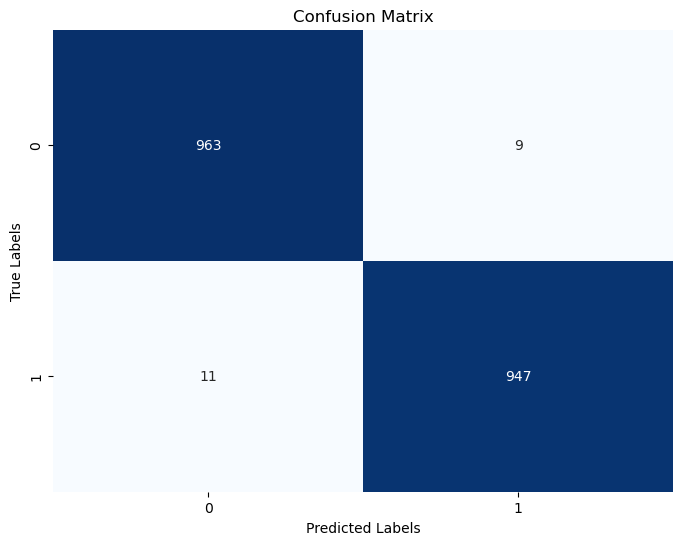

In [30]:
conf_matrix = confusion_matrix(y_test, logreg_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

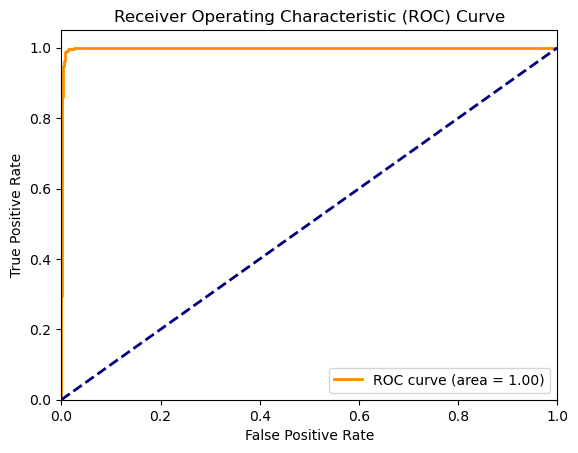

In [31]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Creating Navie Bayes Model for Prediction

In [32]:
nb = BernoulliNB()
nb.fit(X_train,y_train)
nb_pred = nb.predict(X_test)

In [42]:
print("\nAccuracy: ",accuracy_score(y_test,nb_pred))
print("\nClassification Report: ",classification_report(y_test,nb_pred))
print("\nConfusion Matrix: \n",confusion_matrix(y_test,nb_pred))
print("\nROC Score: \n", roc_auc_score(y_test, nb_pred))



Accuracy:  0.9829015544041451

Classification Report:                precision    recall  f1-score   support

           0       0.97      1.00      0.98       972
           1       1.00      0.97      0.98       958

    accuracy                           0.98      1930
   macro avg       0.98      0.98      0.98      1930
weighted avg       0.98      0.98      0.98      1930


Confusion Matrix: 
 [[970   2]
 [ 31 927]]

ROC Score: 
 0.9827916527058258


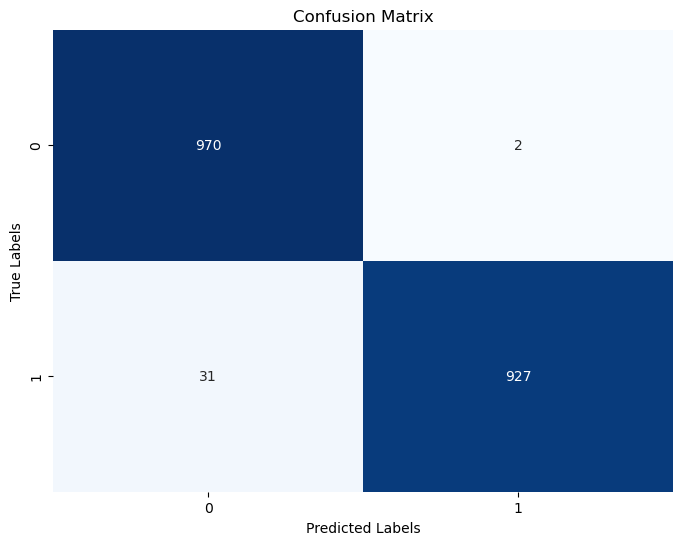

In [34]:
conf_matrix = confusion_matrix(y_test, nb_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

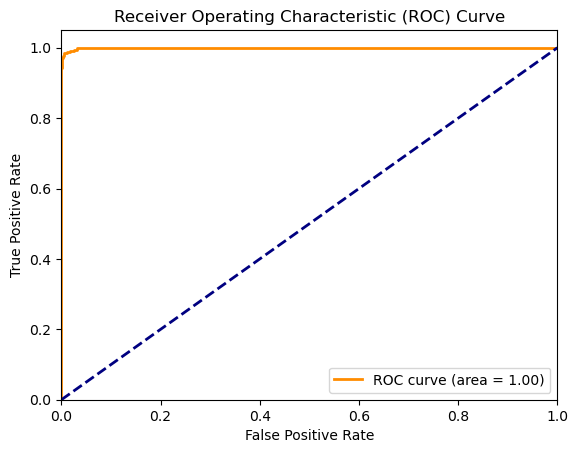

In [35]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Creating SVM Model for Prediction

In [36]:
svm = SVC(kernel= 'linear', random_state=1)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)


In [43]:
print("\nAccuracy: ",accuracy_score(y_test,svm_pred))
print("\nClassification Report: ",classification_report(y_test,svm_pred))
print("\nConfusion Matrix: \n",confusion_matrix(y_test,svm_pred))
print("\nROC Score: \n", roc_auc_score(y_test, svm_pred))


Accuracy:  0.9953367875647668

Classification Report:                precision    recall  f1-score   support

           0       1.00      0.99      1.00       972
           1       0.99      1.00      1.00       958

    accuracy                           1.00      1930
   macro avg       1.00      1.00      1.00      1930
weighted avg       1.00      1.00      1.00      1930


Confusion Matrix: 
 [[966   6]
 [  3 955]]

ROC Score: 
 0.9953478182427382


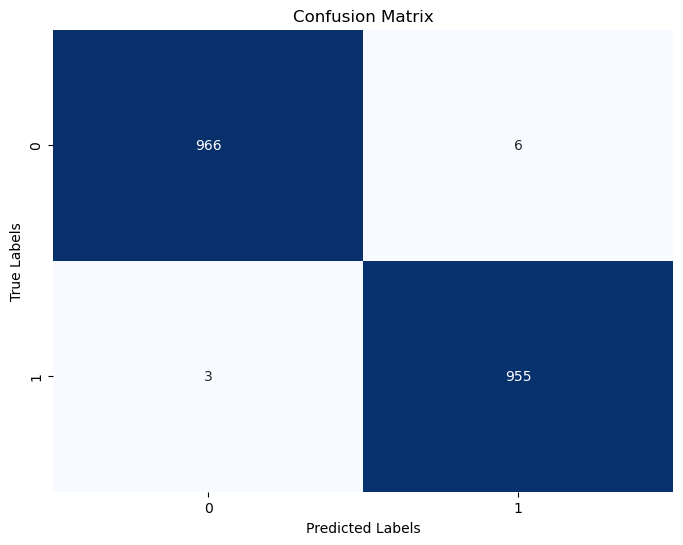

In [39]:
conf_matrix = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

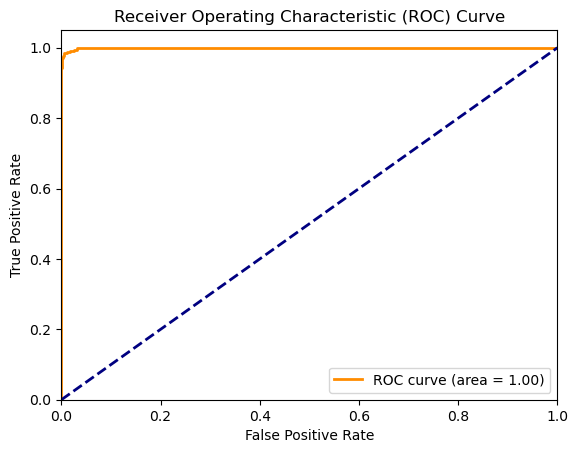

In [40]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()